# **Instagram Reach Analysis**

**Importing the necessary Python Libraries & the Dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
data = pd.read_csv("Instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

**Check if the Dataset Contains any Null values or not**

In [3]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# Analyzing Instagram Reach

**Look at the Distribution of the Impressions recieved from Home**

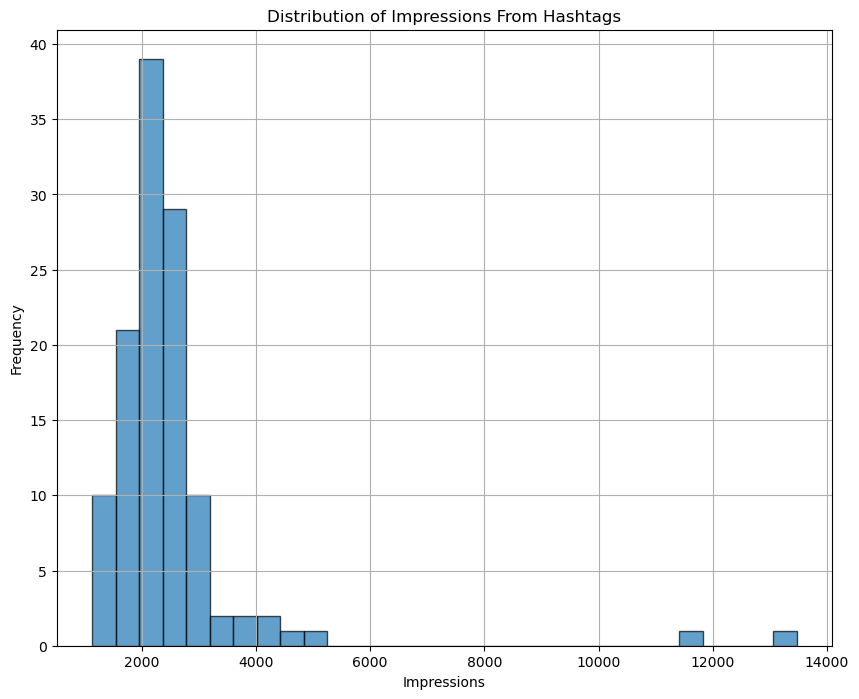

In [6]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")

plt.hist(data['From Home'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Impressions')
plt.ylabel('Frequency')

plt.grid(True)

plt.show() 

**Look at the Distribution of the Impressions recieved from Hashtag**

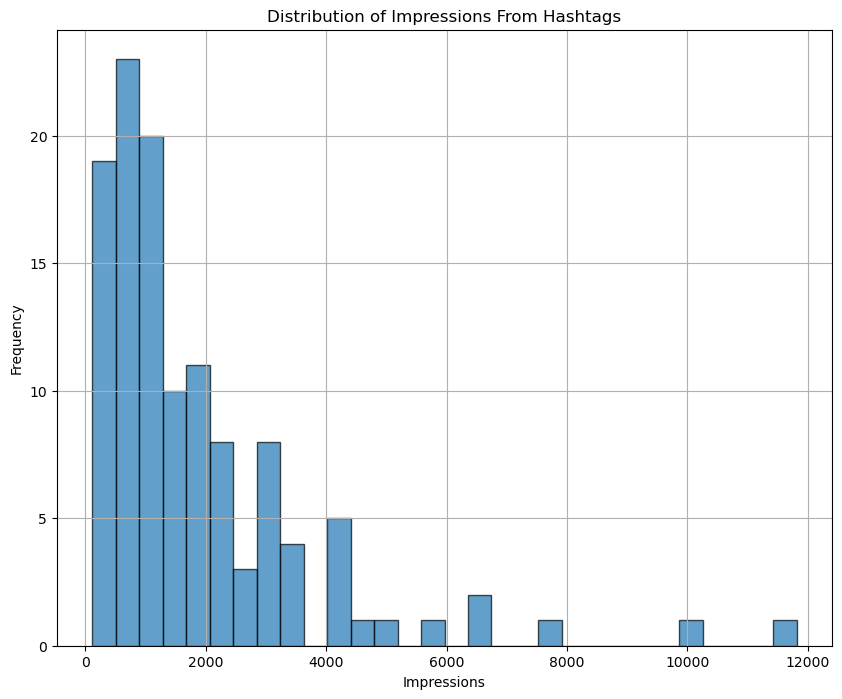

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")

plt.hist(data['From Hashtags'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Impressions')
plt.ylabel('Frequency')

plt.grid(True)

plt.show() 

**Look at the Distribution of the Impressions recieved from Explore**

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")

plt.hist(data['From Explore'], bins=30, edgecolor='black', alpha=0.7)

plt.xlabel('Impressions')
plt.ylabel('Frequency')

plt.grid(True)

plt.show() 

**Look at the Percentage Impressions From Various Sources on Instagram**

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(5, 5))

home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.axis('equal')

plt.show()


# Analyzing Content

**Create a WordCloud of the caption colum to look at the most used words in the caption of my Instagram Post**

In [ ]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Create a WordCloud of the Hashtags column to look at the most used Hashtags in my Instagram posts**

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing Relationships

**Look at the relationship between the number of likes and the number of impressions on my Instagram posts**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

**Look at the relationship between the number of comments and the number of impressions on my Instagram posts**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

**Look at the relationship between the number of shares and the number of impressions**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

**Look at the relationship between the number of saves and the number of impressions**

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

**Look at the relationship between the total profile visits and the number of followers gained from all profile visits:**

In [ ]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

**look at the conversation rate of my Instagram account:**

In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

**Look at the correlation of all the columns with the Impressions column:**

In [ ]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation = data[numeric_columns].corr()
print(correlation['Impressions'].sort_values(ascending=False))

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

# Instagram Reach Prediction Model

**We will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:**

In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

**this how we can train a machine learning model to predict the reach of an Instagram post using Python:**

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)